# Case Study: User survey

In this case study we figure out how to analyse the responses from a user survey form kaggle

The case study is divided into several parts:
- Goals
- Parsing
- Preparation (cleaning)
- Processing
- Exploration
- Visualization
- Conclusion

## Goals

In this section we define questions that will be our guideline througout the case study

- What influences salary?
- Can we deduce common skills for job titles?
- Do higher paid jobs spend time differently?
- Important: education or experience?

We'll (try to) keep these question in mind when performing the case study.

## Parsing

we start out by importing all necessary libraries

In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = [10, 10]

/tmp/ipykernel_9037/2151882340.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


in order to download datasets from kaggle, we need an API key to access their API, we'll make that here

In [2]:
if not os.path.exists(os.path.expanduser('~/.kaggle')):
    os.mkdir(os.path.expanduser('~/.kaggle'))

with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(
        {
            "username":"lorenzf",
            "key":"7a44a9e99b27e796177d793a3d85b8cf"
        }
        , f)

now we can import kaggle too and download the datasets

In [3]:
import kaggle
kaggle.api.dataset_download_files(dataset='kaggle/kaggle-survey-2018', path='./data', unzip=True)

ModuleNotFoundError: No module named 'kaggle'

the csv files are now in the './data' folder, we can now read them using pandas, here is the list of all csv files in our folder

In [4]:
os.listdir('./data')

['WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3358201.csv',
 'noc_regions.csv',
 'freeFormResponses.csv',
 'SurveySchema.csv',
 'jester_ratings.csv',
 'multipleChoiceResponses.csv',
 'one-million-reddit-jokes.csv',
 'jester_items.csv',
 'athlete_events.csv',
 'API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv']

The file of our interest is 'multipleChoiceResponses.csv', it contains the multiple choice responses of our subjects. Let's print out the top 5 events.

In [5]:
choice_df = pd.read_csv('./data/multipleChoiceResponses.csv')
print('shape: ' + str(choice_df.shape))
choice_df.head()

shape: (23860, 395)


/home/lorenzf/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [6]:
free_form_df = pd.read_csv('./data/freeFormResponses.csv')
print('shape: ' + str(free_form_df.shape))
free_form_df.head()

shape: (23860, 35)


/home/lorenzf/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,...,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,...,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I saw that the first row of our choice dataframe contains the questions, to let's extract that.

In [7]:
questions = choice_df.iloc[0]
choice_df = choice_df.drop(0)

In [8]:
questions.head(20)

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT                          In what industry is your current employer/cont...
Q8                   

## Preparation

here we perform tasks to prepare the data in a more pleasing format.

### Data Types

Before we do anything with our data, it is good to see if our data types are in order

In [9]:
choice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 72.1+ MB


Seems there are to many too show, so we have to do some manual work, The first 10 questions seem to be about personal info, where the first one is about gender

In [10]:
print(questions.Q1)
choice_df.Q1.value_counts()

What is your gender? - Selected Choice


Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Q1, dtype: int64

In [11]:
print(questions.Q1_OTHER_TEXT)
choice_df.Q1_OTHER_TEXT.unique()

What is your gender? - Prefer to self-describe - Text


array(['-1', '2', '3', '4', '5', '6', -1, 7, 8, 9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 4,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67], dtype=object)

Hmm the self-describe seems to already been encoded, as there are so many different answers I would opt to ignore those results as they only take up 79 answers of all 24k.
For the second question I am going to convert it to an ordinal value, this way we know the order of the categories.

In [12]:
choice_df.Q2 = choice_df.Q2.astype(pd.api.types.CategoricalDtype(categories=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+'], ordered=True))
print(questions.Q2)
choice_df.Q2

What is your age (# years)?


1        45-49
2        30-34
3        30-34
4        35-39
5        22-24
         ...  
23855    45-49
23856    25-29
23857    22-24
23858    25-29
23859    25-29
Name: Q2, Length: 23859, dtype: category
Categories (12, object): ['18-21' < '22-24' < '25-29' < '30-34' ... '55-59' < '60-69' < '70-79' < '80+']

Next we have a few very important questions that signify the situation of each user in our survey. I chose for nominal categories as I don't want to be biased.

In [13]:
print(questions.Q6)
choice_df.Q6.value_counts()

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


Student                    5253
Data Scientist             4137
Software Engineer          3130
Data Analyst               1922
Other                      1322
Research Scientist         1189
Not employed                842
Consultant                  785
Business Analyst            772
Data Engineer               737
Research Assistant          600
Manager                     590
Product/Project Manager     428
Chief Officer               360
Statistician                237
DBA/Database Engineer       145
Developer Advocate          117
Marketing Analyst           115
Salesperson                 102
Principal Investigator       97
Data Journalist              20
Name: Q6, dtype: int64

In [14]:
print(questions[['Q3', 'Q4', 'Q5', 'Q6', 'Q7']])
choice_df[['Q3', 'Q4', 'Q5', 'Q6', 'Q7']] = choice_df[['Q3', 'Q4', 'Q5', 'Q6', 'Q7']].astype('category')

Q3            In which country do you currently reside?
Q4    What is the highest level of formal education ...
Q5    Which best describes your undergraduate major?...
Q6    Select the title most similar to your current ...
Q7    In what industry is your current employer/cont...
Name: 0, dtype: object


Question 8 is about experience, or as they call it tenure. Not as a numerical value but in categories, so again I create an ordinal category from it.

In [15]:
print(questions.Q8)
choice_df.Q8.value_counts()

How many years of experience do you have in your current role?


0-1      5898
1-2      3745
2-3      2577
5-10     2524
3-4      1751
10-15    1512
4-5      1488
15-20     854
20-25     384
30 +      197
25-30     171
Name: Q8, dtype: int64

In [16]:
choice_df.Q8 = choice_df.Q8.astype(pd.api.types.CategoricalDtype(categories=['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30 +'], ordered=True))
print(questions.Q8)
choice_df.Q8

How many years of experience do you have in your current role?


1         NaN
2        5-10
3         0-1
4         NaN
5         0-1
         ... 
23855    5-10
23856     NaN
23857     0-1
23858     NaN
23859     NaN
Name: Q8, Length: 23859, dtype: category
Categories (11, object): ['0-1' < '1-2' < '2-3' < '3-4' ... '15-20' < '20-25' < '25-30' < '30 +']

And not to forget we have the salary, again as a category, which is unfortunate since we could have been able to create a more accurate prediction in the end.
Here I opt for an ordinal category.

In [17]:
choice_df.Q9.value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                                                      457
200-250,000                       

In [18]:
choice_df.Q9 = choice_df.Q9.astype(pd.api.types.CategoricalDtype(categories=['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300-400,000', '400-500,000', '500,000+',], ordered=True))
choice_df.Q9

1                NaN
2          10-20,000
3           0-10,000
4                NaN
5           0-10,000
            ...     
23855    250-300,000
23856            NaN
23857      10-20,000
23858            NaN
23859            NaN
Name: Q9, Length: 23859, dtype: category
Categories (18, object): ['0-10,000' < '10-20,000' < '20-30,000' < '30-40,000' ... '250-300,000' < '300-400,000' < '400-500,000' < '500,000+']

### Missing values

for each dataframe we apply a few checks in order to see the quality of data

In [19]:
print(100*choice_df.isna().sum().head(20)/choice_df.shape[0])

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q1_OTHER_TEXT                           0.000000
Q2                                      0.000000
Q3                                      0.000000
Q4                                      1.764533
Q5                                      3.822457
Q6                                      4.019448
Q6_OTHER_TEXT                           0.000000
Q7                                      9.111866
Q7_OTHER_TEXT                           0.000000
Q8                                     11.559579
Q9                                     35.332579
Q10                                    13.370217
Q11_Part_1                             60.048619
Q11_Part_2                             77.027537
Q11_Part_3                             78.066977
Q11_Part_4                             69.684396
Q11_Part_5                             79.320173
Q11_Part_6                             85.452031
dtype: float64


You can clearly see that there are a lot of missing values, for questions 11 and onwards this is just because they did not check that answer on a question, but for 1-10 this is a problem as these are 'mandatory' questions. I have no idea how to fill this in and salary is missing about 35%, pretty disastrous, but this is to be expected with user surveys.

Another problem we have here is trolls, there might have been persons that would just fill this in to mess with our data collection, I thought they might have been funny and answered a high salary.

In [20]:
choice_df[choice_df.Q9=='500,000+'].Q2.value_counts()

25-29    13
35-39    10
30-34     7
80+       7
50-54     6
45-49     5
18-21     4
22-24     4
55-59     4
60-69     3
40-44     0
70-79     0
Name: Q2, dtype: int64

you can see there are 13 persons between 25-29 that earn more than 500k annually, which i think is near impossible. Let us see what they are upto.

In [21]:
choice_df[(choice_df.Q9=='500,000+') & (choice_df.Q2=='25-29')]

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
2322,561,Prefer to self-describe,7,25-29,France,I prefer not to answer,Other,Other,113,I am a student,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8899,2116,Male,-1,25-29,Philippines,Bachelor’s degree,Engineering (non-computer focused),Data Analyst,-1,Accounting/Finance,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,260
12092,1607,Male,-1,25-29,China,Doctoral degree,"Information technology, networking, or system ...",Data Scientist,-1,Computers/Technology,...,-1,NaN,Too time-consuming,Requires too much technical knowledge,NaN,NaN,NaN,NaN,NaN,-1
13468,5487,Male,-1,25-29,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,NaN,NaN,-1
14367,359331,Male,-1,25-29,Kenya,Bachelor’s degree,"Medical or life sciences (biology, chemistry, ...",Data Scientist,-1,Computers/Technology,...,166,NaN,NaN,NaN,NaN,NaN,NaN,None of these reasons apply to me,NaN,-1
15469,68,Male,-1,25-29,United States of America,Master’s degree,Mathematics or statistics,Research Scientist,-1,Accounting/Finance,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
15825,94,Female,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Business Analyst,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
16404,78,Prefer not to say,-1,25-29,United States of America,No formal education past high school,NaN,Consultant,-1,Hospitality/Entertainment/Sports,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
18120,281,Female,-1,25-29,Colombia,Doctoral degree,"Computer science (software engineering, etc.)",Data Scientist,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
20576,197,Prefer to self-describe,65,25-29,Belgium,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,I am a student,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


No way they are this succesfull, i'm not yet going to remove them, but i'm definitely going to keep this in mind, this might break our predictions!

Later on I will remove the entries without salaries, but im going to keep them in a prediction dataframe, so we could perhaps predict their salary, we don't have a reference but still might be interesting. For the rest of the preparation im going to keep them in here so the final format of both train and prediction are the same.

### Duplicates

It is very highly unlikely but just to check if no one has entered the same survey twice, we check for duplicates

In [22]:
choice_df[choice_df.duplicated()]

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
15278,36,Male,-1,18-21,China,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
15865,23,Male,-1,18-21,United States of America,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
17521,36,Male,-1,25-29,United States of America,Master’s degree,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
18257,27,Male,-1,25-29,Brazil,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
18320,46,Male,-1,35-39,United States of America,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
18966,43,Male,-1,18-21,India,Bachelor’s degree,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
21214,106,Male,-1,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,-1,I am a student,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
21916,45,Male,-1,22-24,China,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
22049,46,Male,-1,25-29,China,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
22638,60,Male,-1,25-29,China,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


I take back my words, seems there are some faulty entries, perhaps we should even improve our bad entry detection? For now im just going to remove duplicates

In [23]:
choice_df = choice_df.drop_duplicates()

At this point im going to seperate the non salary entries from our training dataframe. resulting in 2 partitions:
- train_df
- prediction_df

In [24]:
prediction_df = choice_df[(choice_df.Q9.isna()) | (choice_df.Q9=='I do not wish to disclose my approximate yearly compensation')]
train_df = choice_df.drop(prediction_df.index)
print('prediction shape:' + str(prediction_df.shape))
print('remaining shape:' + str(train_df.shape))

prediction shape:(8418, 395)
remaining shape:(15429, 395)


## Processing

For other questions I selected a few that caught my interest, here is the list that made it. Notice that I did not perform any preparation on these question as they mostly are checkmarks on a survey, yet in processing I am going to create a more convenient method to store them.

In [25]:
print(questions.Q11_Part_1)
#print(questions.Q12_Part_1_TEXT)
print(questions.Q13_Part_1)
print(questions.Q16_Part_1)
print(questions.Q17)
print(questions.Q19_Part_1)
print(questions.Q21_Part_1)
print(questions.Q31_Part_1)
print(questions.Q34_Part_1)
print(questions.Q42_Part_1)
print(questions.Q49_Part_1)

Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions
Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
What specific programming language do you use most often? - Selected Choice
What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice - Scikit-Learn
What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - ggplot2
Which types of data do you currently interact with most often at work or school? (Select all that apply) - Selected Choice - Audio Data
During a typical data science project at work or schoo

### One hot encoding questions
What I will do here is create a makeshift database, not in SQL as usually just to keep it simple, but in a dictionary of dataframes. For each question I will take the answers and create a one hot encoded table from them, for each user we will know which checkmarks they marked and which they didn't. This view makes it easier to apply statistics and machine learning to the data.

In [26]:
answer_dfs = {}
for question in ['Q11', 'Q13', 'Q16', 'Q19', 'Q21', 'Q31', 'Q34', 'Q42', 'Q49']:
  
    choices = train_df[train_df.columns[train_df.columns.str.contains(question)][:-1]].notnull().astype(int)
    choices.columns = questions[questions.index.str.contains(question)][:-1].str.split(' - ').apply(lambda x: x[-1]).values
    answer_dfs[question] = choices

an example of a question, Q13: Which IDE's have you used in the last 5 years?

In [27]:
answer_dfs['Q13']

,Jupyter/IPython,RStudio,PyCharm,Visual Studio Code,nteract,Atom,MATLAB,Visual Studio,Notepad++,Sublime Text,Vim,IntelliJ,Spyder,None,Other
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0
23845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23855,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0


for some reason they did Q17 differently, so we have to one hot encode it in another method.

In [28]:
answer_dfs['Q17'] = pd.get_dummies(train_df[train_df.columns[train_df.columns.str.contains('Q17')][:-1]])
answer_dfs['Q17']

,Q17_Bash,Q17_C#/.NET,Q17_C/C++,Q17_Go,Q17_Java,Q17_Javascript/Typescript,Q17_Julia,Q17_MATLAB,Q17_Other,Q17_PHP,Q17_Python,Q17_R,Q17_Ruby,Q17_SAS/STATA,Q17_SQL,Q17_Scala,Q17_Visual Basic/VBA
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23855,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


That was for our choices data, where the questions are based on choices, for generic info we do it a bit different, we create a general dataframe containing all info.

In [29]:
info_df = train_df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
#info_df.columns = questions[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]

In [30]:
info_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods)
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",I do not know
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",I do not know
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods)
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo..."
...,...,...,...,...,...,...,...,...,...,...
23844,Male,30-34,Netherlands,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Technology,10-15,"90-100,000",We are exploring ML methods (and may one day p...
23845,Male,22-24,Romania,Master’s degree,Mathematics or statistics,Student,I am a student,0-1,"0-10,000",NaN
23854,Male,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,Academics/Education,5-10,"10-20,000",NaN
23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,5-10,"250-300,000","We recently started using ML methods (i.e., mo..."


### Mean choice Matrix
As we have so much information to process, I opted to keep it dynamic, the following function helps in that, it calculates for a question from our choice database the mean occurence for each group in a feature of the info dataframe.
Let's say we want to know the average amount of persons that know a specific language for each role/job title. We would have to match Q16 (known languages) with Q6 (job description). This is performed below, notice how it both performs a merge (join) and a groupby to get the result.

In [31]:
def mean_choice_matrix(info, question):
    return info_df[[info]].join(answer_dfs[question]).groupby(info).mean()

In [32]:
mean_choice_matrix('Q6','Q16')

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Q6,,,,,,,,,,,,,,,,,,
Business Analyst,0.605085,0.401695,0.547458,0.049153,0.079661,0.084746,0.189831,0.069492,0.030508,0.016949,0.003390,0.005085,0.042373,0.035593,0.006780,0.091525,0.054237,0.027119
Chief Officer,0.717131,0.274900,0.430279,0.191235,0.183267,0.306773,0.083665,0.139442,0.091633,0.067729,0.015936,0.059761,0.103586,0.103586,0.043825,0.035857,0.023904,0.055777
Consultant,0.692845,0.413613,0.472949,0.116928,0.136126,0.165794,0.111693,0.078534,0.062827,0.024433,0.010471,0.012216,0.082024,0.052356,0.012216,0.073298,0.031414,0.041885
DBA/Database Engineer,0.666667,0.307692,0.717949,0.188034,0.213675,0.128205,0.068376,0.102564,0.051282,0.025641,0.000000,0.017094,0.179487,0.042735,0.008547,0.025641,0.008547,0.017094
Data Analyst,0.647059,0.484594,0.586134,0.079132,0.093137,0.098039,0.110644,0.079132,0.067227,0.028711,0.005602,0.006303,0.039916,0.032213,0.014006,0.105042,0.011905,0.018908
Data Engineer,0.801418,0.248227,0.510638,0.223404,0.246454,0.184397,0.053191,0.132979,0.081560,0.161348,0.008865,0.033688,0.086879,0.054965,0.015957,0.033688,0.003546,0.028369
Data Journalist,0.600000,0.400000,0.400000,0.200000,0.200000,0.400000,0.000000,0.100000,0.200000,0.100000,0.000000,0.000000,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000
Data Scientist,0.860265,0.429671,0.511542,0.193906,0.100031,0.098492,0.043398,0.105571,0.076023,0.068637,0.014158,0.018159,0.040320,0.024007,0.008618,0.058172,0.001847,0.023084
Developer Advocate,0.611765,0.211765,0.482353,0.094118,0.341176,0.400000,0.094118,0.141176,0.035294,0.035294,0.000000,0.023529,0.211765,0.141176,0.023529,0.011765,0.000000,0.058824


We can see that for each combination of job title and programming language an average between 0 and 1 persons have checked this option, e.g. the combination of data scientist and python equals 0.86, meaning that 86% of data scientists know python. 

Similarly we can also calculate correlation between choices from our choice database, here we did it again for Question 16.

In [33]:
answer_dfs['Q16'].corr()

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Python,1.000000,0.077293,0.191304,0.188435,0.141813,0.125164,0.007550,0.183621,0.131117,0.095374,0.039096,0.053180,0.046182,0.048012,0.031308,-0.009036,-0.206520,0.009641
R,0.077293,1.000000,0.223527,0.032511,-0.034205,-0.039002,0.098949,-0.049046,0.030446,0.033991,0.063129,-0.016114,-0.039415,-0.006318,0.014921,0.198183,-0.085536,-0.001240
SQL,0.191304,0.223527,1.000000,0.161086,0.135890,0.192323,0.159062,-0.034188,-0.047761,0.117620,0.013813,0.048231,0.134615,0.157483,0.056242,0.120958,-0.101752,0.001674
Bash,0.188435,0.032511,0.161086,1.000000,0.078031,0.146723,-0.026907,0.082853,0.010577,0.116862,0.058785,0.104544,0.000396,0.054351,0.103550,-0.032248,-0.049637,0.056457
Java,0.141813,-0.034205,0.135890,0.078031,1.000000,0.254773,0.024432,0.227691,0.064536,0.165490,0.005821,0.073318,0.137888,0.177413,0.067257,-0.040728,-0.056888,0.026739
Javascript/Typescript,0.125164,-0.039002,0.192323,0.146723,0.254773,1.000000,0.049290,0.095921,-0.004829,0.060073,0.025601,0.118897,0.222775,0.307413,0.127312,-0.048567,-0.052961,0.034497
Visual Basic/VBA,0.007550,0.098949,0.159062,-0.026907,0.024432,0.049290,1.000000,0.020796,0.019424,0.005185,0.037063,0.002042,0.122287,0.077126,0.011487,0.093618,-0.032002,-0.004965
C/C++,0.183621,-0.049046,-0.034188,0.082853,0.227691,0.095921,0.020796,1.000000,0.260311,0.004697,0.049980,0.048903,0.134850,0.111623,0.041745,-0.052866,-0.058636,0.019235
MATLAB,0.131117,0.030446,-0.047761,0.010577,0.064536,-0.004829,0.019424,0.260311,1.000000,0.003116,0.056403,0.003529,0.029772,0.046232,0.014027,0.015261,-0.044376,-0.000043
Scala,0.095374,0.033991,0.117620,0.116862,0.165490,0.060073,0.005185,0.004697,0.003116,1.000000,0.049863,0.077110,0.006505,0.021619,0.066129,0.012633,-0.025780,0.014499


Here we see thich answers are checked usually together or not, as an example we see that python and SQL have a correlation of 19% whilst Python and R have a correlation of 7.7% which is logical as Python and R have a similar purpose and SQL is complementary. Obviously None is always negatively correlated, a good example of obsolete information!

### Count matrix
to correlate information between 2 questions of the info dataframe, we create a function that counts the occurence of each combination. An example is given for question 2 (age) and Question 7 (industry). With this information we can find out if there is a correlation between information of our users in the survey, not specifically their choices on the multiple choice answers.

In [34]:
def count_matrix(q1, q2):
    return info_df[[q1, q2]].groupby([q1, q2]).size().unstack()
def mean_matrix(q1, q2):
    return info_df[[q1, q2]].groupby([q1, q2]).size().unstack().apply(lambda x: x/x.sum(), axis='columns')

In [35]:
count_matrix('Q2', 'Q7')

Q7,Academics/Education,Accounting/Finance,Broadcasting/Communications,Computers/Technology,Energy/Mining,Government/Public Service,Hospitality/Entertainment/Sports,I am a student,Insurance/Risk Assessment,Manufacturing/Fabrication,Marketing/CRM,Medical/Pharmaceutical,Military/Security/Defense,Non-profit/Service,Online Business/Internet-based Sales,Online Service/Internet-based Services,Other,Retail/Sales,Shipping/Transportation
Q2,,,,,,,,,,,,,,,,,,,
18-21,117,27,4,194,8,9,3,869,12,7,11,16,9,2,12,20,27,9,7
22-24,322,198,38,786,38,37,22,811,56,41,71,76,33,16,43,123,98,59,26
25-29,539,361,86,1250,97,118,39,424,131,111,124,179,31,50,107,227,227,110,67
30-34,364,252,66,795,81,125,34,89,109,96,83,127,25,40,62,162,169,81,59
35-39,243,141,56,454,44,74,25,32,73,62,50,76,22,17,23,86,79,44,36
40-44,146,82,33,279,40,48,14,12,30,40,22,37,14,13,14,51,69,25,20
45-49,91,47,24,195,13,40,5,5,15,32,12,27,4,9,5,24,34,14,6
50-54,71,38,5,123,8,34,3,2,16,21,4,21,6,5,4,10,18,5,9
55-59,35,18,4,64,7,17,5,3,7,12,6,17,2,1,1,4,10,6,3


## Exploration

To start of our exploration I would like to know what influences our salary, to do so I created a count_matrix function that counts the occurences of each option with information questions, to illustrate an example with Q4: which degree?

In [36]:
count_matrix('Q4', 'Q9')

Q9,"0-10,000","10-20,000","20-30,000","30-40,000","40-50,000","50-60,000","60-70,000","70-80,000","80-90,000","90-100,000","100-125,000","125-150,000","150-200,000","200-250,000","250-300,000","300-400,000","400-500,000","500,000+"
Q4,,,,,,,,,,,,,,,,,,
Bachelor’s degree,1790,567,341,259,223,183,176,159,118,124,166,115,89,23,15,12,4,19
Doctoral degree,343,307,255,223,183,179,157,120,102,110,185,124,120,55,25,18,7,9
I prefer not to answer,38,32,9,8,6,9,7,3,1,2,5,1,2,1,1,0,1,4
Master’s degree,1812,909,672,546,491,491,353,353,260,304,449,265,223,77,32,20,9,20
No formal education past high school,32,20,8,16,10,15,1,7,4,4,4,2,3,2,0,0,1,6
Professional degree,112,61,56,34,21,18,15,11,6,11,11,7,8,9,0,2,0,2
Some college/university study without earning a bachelor’s degree,271,41,54,33,31,24,20,24,15,11,23,19,12,5,2,0,1,3


By using a contingency chi squared test we can find out which degrees are under- and overrepresented for which salary ranges.

In [37]:
F, p, df, exp = scipy.stats.chi2_contingency(count_matrix('Q4','Q9'))
F, p

(1065.634531227411, 3.0827908345529236e-160)

With such significance we already know this is not a coincidence and the correlation will propably be large. comparing true and expected values we can see where the difference is.

In [38]:
degree_diff = count_matrix('Q4', 'Q9')-exp
degree_diff

Q9,"0-10,000","10-20,000","20-30,000","30-40,000","40-50,000","50-60,000","60-70,000","70-80,000","80-90,000","90-100,000","100-125,000","125-150,000","150-200,000","200-250,000","250-300,000","300-400,000","400-500,000","500,000+"
Q4,,,,,,,,,,,,,,,,,,
Bachelor’s degree,540.636205,16.745868,-55.285242,-58.880420,-51.132802,-78.065332,-31.090997,-33.319074,-25.742174,-36.786700,-73.475598,-36.412211,-40.822477,-25.860976,-6.305658,-2.771923,-2.533735,1.103247
Doctoral degree,-375.890142,-9.618964,26.975501,40.090025,25.262622,28.781710,37.838810,9.338648,19.290038,17.482533,47.204550,36.876661,45.299501,26.885151,12.740618,9.500162,3.240456,-1.297881
I prefer not to answer,0.943807,15.679435,-2.753840,-1.428349,-2.130793,1.256789,0.857671,-2.704193,-3.263400,-2.768942,-2.102858,-3.490894,-1.850541,-0.449219,0.368073,-0.438136,0.806209,3.469181
Master’s degree,-264.857087,-5.704906,13.242465,17.577290,35.300344,57.022814,8.746063,33.301899,21.052823,36.719165,50.912114,13.302677,7.191976,-4.223151,-3.417072,-4.555836,-1.861235,-9.750340
No formal education past high school,-6.481431,3.051721,-4.205911,6.209022,1.556485,6.958973,-5.378573,1.076415,-0.427377,-0.952362,-3.376045,-2.663620,-0.998639,0.495042,-0.656232,-0.454987,0.798756,5.448765
Professional degree,2.541707,12.791561,21.280964,6.150107,-3.017111,-4.872254,-3.143496,-5.849310,-6.593428,-3.086720,-9.980751,-6.265409,-3.373906,4.719230,-1.866615,0.705814,-0.572429,0.432044
Some college/university study without earning a bachelor’s degree,103.106941,-32.944714,0.746063,-9.717675,-5.838745,-11.082701,-7.829477,-1.844384,-4.316482,-10.606974,-9.181412,-1.347203,-5.445914,-1.566077,-0.863115,-1.985093,0.121978,0.594983


It would be very hard to analyse this difference using the complete matrix, I propose we take the sum of differences for the high paying jobs and compare those.
As a threshold of high-paying I chose to go for those who 'earn six figures'.

In [39]:
degree_diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()

Q4
Bachelor’s degree                                                   -188.182578
Some college/university study without earning a bachelor’s degree    -20.266835
Professional degree                                                  -16.634066
I prefer not to answer                                                -7.157366
No formal education past high school                                  -6.855726
Master’s degree                                                       57.349472
Doctoral degree                                                      181.747100
dtype: float64

By the looks of it, it pays of to study longer and get more degrees, as a Masters degree is overrepresented by 57 persons and Doctoral degrees even by 181 persons. On the other side Bachelors or Professional degrees are underrepresented whilst no formal education is not particularly underperforming. 

We can do the same for Q5: which field? were we analyse in which field the person works compared with their salary.

In [40]:
df = count_matrix('Q5', 'Q9')
df = df.loc[~(df==0).all(axis=1)]
F, p, deg, exp = scipy.stats.chi2_contingency(df)
print(f'F: {F}, p: {p}')
diff = df-exp
diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()

F: 1090.8622667456245, p: 4.440076551687432e-121


Q5
Computer science (software engineering, etc.)                   -226.894272
Information technology, networking, or system administration     -48.957238
I never declared a major                                          -1.528181
Environmental science or geology                                  -1.521054
Medical or life sciences (biology, chemistry, medicine, etc.)      5.826010
Other                                                             10.079966
Fine arts or performing arts                                      12.732902
Humanities (history, literature, philosophy, etc.)                28.574735
Social sciences (anthropology, psychology, sociology, etc.)       31.130313
Mathematics or statistics                                         39.390480
Physics or astronomy                                              47.878580
Engineering (non-computer focused)                                51.042958
A business discipline (accounting, economics, finance, etc.)      52.244802
dtype: fl

We have a clear loser here, for some reason the computer science department seems to be underpayed or either not worth their money. on the other side there is a more gradual increase and most fields are over represented in the region of highly paid jobs.

What about Q6: your job description?

In [41]:
df = count_matrix('Q6', 'Q9')
df = df.loc[~(df==0).all(axis=1)]
F, p, deg, exp = scipy.stats.chi2_contingency(df)
print(f'F: {F}, p: {p}')
prof_diff = df-exp
prof_diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()

F: 5430.1040630013995, p: 0.0


Q6
Student                   -342.940761
Data Analyst               -97.451682
Research Assistant         -58.433405
Business Analyst           -45.406507
Research Scientist         -15.196643
DBA/Database Engineer       -2.341629
Salesperson                 -2.173764
Statistician                -2.140968
Developer Advocate          -0.872124
Marketing Analyst           -0.151468
Data Journalist              2.603280
Software Engineer            4.167412
Data Engineer               20.224966
Principal Investigator      22.407220
Other                       28.674185
Product/Project Manager     30.047897
Consultant                  56.967918
Chief Officer               70.942316
Manager                    101.868235
Data Scientist             229.205522
dtype: float64

Highly expected students score very bad here, which is a good confirmation. Something remarkable here is the difference between Data Analyst and Data Scientist, two jobs that seem to be similar have such a difference in representation in the high paid region. 

To complete the analysis we also chose Q7: which sector?

In [42]:
df = count_matrix('Q7', 'Q9')
df = df.loc[~(df==0).all(axis=1)]
F, p, deg, exp = scipy.stats.chi2_contingency(df)
print(f'F: {F}, p: {p}')
diff = df-exp
diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()

F: 4518.06867284469, p: 0.0


Q7
I am a student                           -290.982760
Academics/Education                      -160.690323
Non-profit/Service                         -6.369823
Online Business/Internet-based Sales        0.009203
Broadcasting/Communications                 3.444617
Manufacturing/Fabrication                   4.242660
Military/Security/Defense                   8.049193
Retail/Sales                               10.276752
Government/Public Service                  11.811848
Shipping/Transportation                    11.897725
Marketing/CRM                              12.086590
Energy/Mining                              13.813144
Hospitality/Entertainment/Sports           15.769849
Other                                      24.245965
Insurance/Risk Assessment                  33.588891
Medical/Pharmaceutical                     50.314149
Online Service/Internet-based Services     57.134487
Accounting/Finance                         74.047314
Computers/Technology                      1

Here we can again see the students, this time acompanied by the Academics/Education sector, which is understandable as it usually is a non-profit governmental oranization.
Leading the charts we have the Computers/Technology sector which is currently booming.

### Common skills

Aside from salary we also are interested in most common skills for a specific job title, therefore I took the averages of each choice for a multiple choice question. Here as example the combination of Q6: which job and Q16: what languages?

In [43]:
mean_choice_matrix('Q6', 'Q16')

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Q6,,,,,,,,,,,,,,,,,,
Business Analyst,0.605085,0.401695,0.547458,0.049153,0.079661,0.084746,0.189831,0.069492,0.030508,0.016949,0.003390,0.005085,0.042373,0.035593,0.006780,0.091525,0.054237,0.027119
Chief Officer,0.717131,0.274900,0.430279,0.191235,0.183267,0.306773,0.083665,0.139442,0.091633,0.067729,0.015936,0.059761,0.103586,0.103586,0.043825,0.035857,0.023904,0.055777
Consultant,0.692845,0.413613,0.472949,0.116928,0.136126,0.165794,0.111693,0.078534,0.062827,0.024433,0.010471,0.012216,0.082024,0.052356,0.012216,0.073298,0.031414,0.041885
DBA/Database Engineer,0.666667,0.307692,0.717949,0.188034,0.213675,0.128205,0.068376,0.102564,0.051282,0.025641,0.000000,0.017094,0.179487,0.042735,0.008547,0.025641,0.008547,0.017094
Data Analyst,0.647059,0.484594,0.586134,0.079132,0.093137,0.098039,0.110644,0.079132,0.067227,0.028711,0.005602,0.006303,0.039916,0.032213,0.014006,0.105042,0.011905,0.018908
Data Engineer,0.801418,0.248227,0.510638,0.223404,0.246454,0.184397,0.053191,0.132979,0.081560,0.161348,0.008865,0.033688,0.086879,0.054965,0.015957,0.033688,0.003546,0.028369
Data Journalist,0.600000,0.400000,0.400000,0.200000,0.200000,0.400000,0.000000,0.100000,0.200000,0.100000,0.000000,0.000000,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000
Data Scientist,0.860265,0.429671,0.511542,0.193906,0.100031,0.098492,0.043398,0.105571,0.076023,0.068637,0.014158,0.018159,0.040320,0.024007,0.008618,0.058172,0.001847,0.023084
Developer Advocate,0.611765,0.211765,0.482353,0.094118,0.341176,0.400000,0.094118,0.141176,0.035294,0.035294,0.000000,0.023529,0.211765,0.141176,0.023529,0.011765,0.000000,0.058824


This does give us a lot of information, e.g. that 86% of all data scientists use python, yet it does not show correlation between answers, therefore we would need to go back to our original one hot encoded data and merge with the necessary info, it look like this.

In [44]:
df = info_df[['Q6','Q9']].join(answer_dfs['Q16'])
df.head()

,Q6,Q9,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
2,Other,"10-20,000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Data Scientist,"0-10,000",0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Data Analyst,"0-10,000",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Other,"10-20,000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Other,"0-10,000",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


To deduce the correlation for all persons, we would not need Q6 or Q9, this will become necessary when we want to select subgroups. For now we calculate the percentage of all persons that have chosen each option

In [45]:
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Python                   0.735563
SQL                      0.403072
R                        0.323028
C/C++                    0.183162
Java                     0.174282
Javascript/Typescript    0.154644
Bash                     0.138441
MATLAB                   0.113812
C#/.NET                  0.077452
Visual Basic/VBA         0.062609
PHP                      0.054443
SAS/STATA                0.052045
Scala                    0.041545
Other                    0.030203
Go                       0.018601
Ruby                     0.016138
None                     0.015101
Julia                    0.010953
dtype: float64

We can see that options as Python, SQL and R are very popular, yet how do they correlate? Are the same persons who pick python also those who pick R? We use the numerical correlation to calculate this. Notice that I use the Spearman Rank as our data consists of 0 and 1, being non-normal distributed.

In [46]:
all_jobs_corr = df.corr('spearman')
all_jobs_corr

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Python,1.000000,0.077293,0.191304,0.188435,0.141813,0.125164,0.007550,0.183621,0.131117,0.095374,0.039096,0.053180,0.046182,0.048012,0.031308,-0.009036,-0.206520,0.009641
R,0.077293,1.000000,0.223527,0.032511,-0.034205,-0.039002,0.098949,-0.049046,0.030446,0.033991,0.063129,-0.016114,-0.039415,-0.006318,0.014921,0.198183,-0.085536,-0.001240
SQL,0.191304,0.223527,1.000000,0.161086,0.135890,0.192323,0.159062,-0.034188,-0.047761,0.117620,0.013813,0.048231,0.134615,0.157483,0.056242,0.120958,-0.101752,0.001674
Bash,0.188435,0.032511,0.161086,1.000000,0.078031,0.146723,-0.026907,0.082853,0.010577,0.116862,0.058785,0.104544,0.000396,0.054351,0.103550,-0.032248,-0.049637,0.056457
Java,0.141813,-0.034205,0.135890,0.078031,1.000000,0.254773,0.024432,0.227691,0.064536,0.165490,0.005821,0.073318,0.137888,0.177413,0.067257,-0.040728,-0.056888,0.026739
Javascript/Typescript,0.125164,-0.039002,0.192323,0.146723,0.254773,1.000000,0.049290,0.095921,-0.004829,0.060073,0.025601,0.118897,0.222775,0.307413,0.127312,-0.048567,-0.052961,0.034497
Visual Basic/VBA,0.007550,0.098949,0.159062,-0.026907,0.024432,0.049290,1.000000,0.020796,0.019424,0.005185,0.037063,0.002042,0.122287,0.077126,0.011487,0.093618,-0.032002,-0.004965
C/C++,0.183621,-0.049046,-0.034188,0.082853,0.227691,0.095921,0.020796,1.000000,0.260311,0.004697,0.049980,0.048903,0.134850,0.111623,0.041745,-0.052866,-0.058636,0.019235
MATLAB,0.131117,0.030446,-0.047761,0.010577,0.064536,-0.004829,0.019424,0.260311,1.000000,0.003116,0.056403,0.003529,0.029772,0.046232,0.014027,0.015261,-0.044376,-0.000043
Scala,0.095374,0.033991,0.117620,0.116862,0.165490,0.060073,0.005185,0.004697,0.003116,1.000000,0.049863,0.077110,0.006505,0.021619,0.066129,0.012633,-0.025780,0.014499


As an example you can see that for those who chose python (the column called python) there is a 7.7% correlation with R and 19.1% with SQL, so a person who uses python is more likely to also know SQL (or Bash) rather than R. This is understandable as those languages are similar in usage.

Now we want to change things so we don't look towards all persons, but only data scientists, as I am a data scientist and want to know which languages I should learn more about.

In [47]:
df = df[df['Q6']=='Data Scientist']
data_science_corr = df.corr('spearman')
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Python                   0.860265
SQL                      0.511542
R                        0.429671
Bash                     0.193906
C/C++                    0.105571
Java                     0.100031
Javascript/Typescript    0.098492
MATLAB                   0.076023
Scala                    0.068637
SAS/STATA                0.058172
Visual Basic/VBA         0.043398
C#/.NET                  0.040320
PHP                      0.024007
Other                    0.023084
Go                       0.018159
Julia                    0.014158
Ruby                     0.008618
None                     0.001847
dtype: float64

For the case of percentage that have chosen languages, things do not drastically change, although all percentages are up much more. You can see that the shell scripting language Bash has shifted upwards so a basic knowledge in Bash would not hurt.

For the correlation I opted to show the difference with the all persons correlation.

In [48]:
data_science_corr-all_jobs_corr

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Python,0.000000,-0.053854,0.018683,-0.035673,-0.042951,-0.024721,0.008582,-0.091380,-0.065754,-0.007031,-0.020853,-0.024962,0.000325,-0.013800,-0.012939,0.021968,0.099795,-0.006802
R,-0.053854,0.000000,-0.002263,-0.030455,0.047379,0.027537,0.003023,0.040190,0.020863,-0.026163,0.022313,0.005169,0.016383,0.032662,-0.008402,-0.063263,0.048202,0.033430
SQL,0.018683,-0.002263,0.000000,0.020711,-0.076892,-0.086304,-0.047632,-0.020833,0.049269,0.006402,0.030326,-0.035231,-0.056398,-0.084676,-0.025087,0.021932,0.057734,0.021428
Bash,-0.035673,-0.030455,0.020711,0.000000,-0.052135,-0.039736,-0.004962,-0.028407,-0.010267,-0.009835,-0.005540,-0.031319,-0.009901,-0.044813,-0.073477,0.000158,0.028540,-0.022983
Java,-0.042951,0.047379,-0.076892,-0.052135,0.000000,-0.051694,0.025389,-0.051798,0.033358,0.032070,0.015005,-0.049516,0.038876,0.018255,-0.020655,0.019228,0.042548,-0.009677
Javascript/Typescript,-0.024721,0.027537,-0.086304,-0.039736,-0.051694,0.000000,-0.003094,0.005652,0.046422,0.005440,-0.012755,-0.040080,-0.022725,-0.096084,-0.057557,0.023788,0.038744,-0.016523
Visual Basic/VBA,0.008582,0.003023,-0.047632,-0.004962,0.025389,-0.003094,0.000000,-0.020233,0.027772,-0.003260,0.014130,-0.008382,-0.020037,0.037497,0.017683,0.027697,0.022840,0.012460
C/C++,-0.091380,0.040190,-0.020833,-0.028407,-0.051798,0.005652,-0.020233,0.000000,0.000168,0.024847,-0.014849,0.039396,-0.001594,-0.028092,0.012913,0.027393,0.043858,-0.012017
MATLAB,-0.065754,0.020863,0.049269,-0.010267,0.033358,0.046422,0.027772,0.000168,0.000000,0.010878,0.046837,0.018341,0.029507,0.045341,0.047175,0.012680,0.032038,-0.005384
Scala,-0.007031,-0.026163,0.006402,-0.009835,0.032070,0.005440,-0.003260,0.024847,0.010878,0.000000,-0.030876,0.004490,0.005925,-0.000573,-0.038760,-0.007288,0.014104,0.016729


In the Python column we can see that generic non Data Science languages such as C/C++ and Java are falling, yet the correlation with Bash is also negative, this indicates by selecting Data Science profiles we have on average more people choosing for Bash, but NOT in combination with Python.
Although results are somewhat expected, there do not seem to be any drastic changes.

To shake things up more, we apply a second filter, where we only take the persons who earn more than 100k.

In [49]:
df = df.loc[('100-125,000'<df.Q9) & (df.Q9<'500,000+')]
high_paying_job_corr = df.corr('spearman')
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Python                   0.896635
SQL                      0.608173
R                        0.459135
Bash                     0.274038
Scala                    0.105769
Java                     0.093750
Javascript/Typescript    0.088942
C/C++                    0.067308
SAS/STATA                0.062500
MATLAB                   0.055288
Visual Basic/VBA         0.043269
C#/.NET                  0.043269
Other                    0.031250
PHP                      0.021635
Julia                    0.019231
Go                       0.019231
Ruby                     0.009615
None                     0.002404
dtype: float64

For the average of choices we can now see that Scala - a language used for big data - shootsj up the ranks, indicating that having a data engineering language in your knowledge base is good for your salary.

To compare the correlation of high paying data science jobs I took the difference with correlation of all jobs.

In [50]:
high_paying_job_corr-all_jobs_corr

,Python,R,SQL,Bash,Java,Javascript/Typescript,Visual Basic/VBA,C/C++,MATLAB,Scala,Julia,Go,C#/.NET,PHP,Ruby,SAS/STATA,None,Other
Python,0.000000,-0.065523,-0.027102,-0.032937,-0.140966,-0.046816,-0.012961,-0.155440,-0.083528,0.021397,0.008448,-0.005636,-0.051593,-0.051796,0.002147,0.031462,0.061944,0.005959
R,-0.065523,0.000000,0.031806,-0.014573,0.052306,0.090043,-0.010383,0.032570,0.021053,-0.052843,0.053728,-0.042652,-0.014271,0.068248,-0.006841,-0.057440,0.040308,0.057555
SQL,-0.027102,0.031806,0.000000,0.011898,-0.063562,-0.131819,-0.060971,-0.064647,0.048020,0.030335,0.062726,-0.007548,-0.133335,-0.105817,-0.027615,-0.035771,0.040596,0.029281
Bash,-0.032937,-0.014573,0.011898,0.000000,-0.016784,-0.016832,0.055178,-0.032800,0.005863,0.022321,0.012154,0.005638,-0.078079,-0.034582,-0.108861,0.007200,0.019477,0.019045
Java,-0.140966,0.052306,-0.063562,-0.016784,0.000000,-0.065553,0.028768,-0.149517,0.038082,0.126133,-0.050859,-0.058305,-0.003621,0.114871,0.070073,-0.008248,0.041100,0.010292
Javascript/Typescript,-0.046816,0.090043,-0.131819,-0.016832,-0.065553,0.000000,-0.032728,0.022367,0.040091,-0.030239,-0.007864,-0.039671,0.001309,-0.179745,0.014972,0.037665,0.037624,-0.042081
Visual Basic/VBA,-0.012961,-0.010383,-0.060971,0.055178,0.028768,-0.032728,0.000000,-0.030771,-0.019176,-0.001491,0.019187,-0.031821,-0.051377,0.053665,-0.032441,0.046707,0.021562,0.034672
C/C++,-0.155440,0.032570,-0.064647,-0.032800,-0.149517,0.022367,-0.030771,0.000000,-0.157380,0.027699,-0.017737,-0.016661,-0.050517,-0.019681,0.030100,0.102410,0.045449,-0.012343
MATLAB,-0.083528,0.021053,0.048020,0.005863,0.038082,0.040091,-0.019176,-0.157380,0.000000,0.016286,-0.013690,-0.037404,-0.029523,0.062386,0.069920,0.009181,0.032500,0.017045
Scala,0.021397,-0.052843,0.030335,0.022321,0.126133,-0.030239,-0.001491,0.027699,0.016286,0.000000,-0.041107,-0.068354,-0.041228,-0.019036,-0.019920,-0.069142,0.008898,0.013578


Again as I mainly use python I will be looking at the Python column, you can see that Scala is indeed correlated with Python and Java or C/C++ is not a must at all.

In a similar fashion we evaluate the influence of machine learning toolkits, where we first see the average choice of all persons.

In [51]:
df = info_df[['Q6','Q9']].join(answer_dfs['Q19'])
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Scikit-Learn    0.588113
TensorFlow      0.476635
Keras           0.393026
randomForest    0.290168
Xgboost         0.278761
PyTorch         0.183226
None            0.128071
Caret           0.114395
Spark MLlib     0.108108
lightgbm        0.105256
H20             0.069674
Fastai          0.055350
Caffe           0.053730
catboost        0.051656
Prophet         0.039406
CNTK            0.035647
Mxnet           0.030916
mlr             0.027027
Other           0.025731
dtype: float64

Scikit-learn or sklearn (the one we sometimes use) is chosen the most often, problably because of it's ease of use and effectiveness. Now we would like to see the choice of data scientists

In [52]:
df = df[df['Q6']=='Data Scientist']
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Scikit-Learn    0.791936
TensorFlow      0.607879
Keras           0.567251
Xgboost         0.534626
randomForest    0.474608
PyTorch         0.251154
Caret           0.224685
lightgbm        0.224685
Spark MLlib     0.219452
H20             0.157279
catboost        0.114805
Fastai          0.101878
Prophet         0.098492
Caffe           0.063096
CNTK            0.060634
Mxnet           0.055094
mlr             0.052324
Other           0.029240
None            0.023392
dtype: float64

No particular shifts although None has dropped to the last place, indicating that knowledge of Machine Learning is essential for a Data Scientist.

What happens when we only ask the high paying data scientists?

In [53]:
df = df.loc[('100-125,000'<df.Q9) & (df.Q9<'500,000+')]
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Scikit-Learn    0.838942
TensorFlow      0.639423
Xgboost         0.598558
Keras           0.596154
randomForest    0.504808
Spark MLlib     0.310096
PyTorch         0.278846
Caret           0.245192
lightgbm        0.245192
H20             0.216346
Prophet         0.120192
Fastai          0.115385
catboost        0.110577
Mxnet           0.086538
Caffe           0.086538
CNTK            0.079327
mlr             0.055288
Other           0.036058
None            0.021635
dtype: float64

Nothing in particular, except that all percentages have increased, to conclude your choice of machine learning library is not that important!

### Time spend

I would also like to know how other data scientists spend their time, in the same fashion we analyse this

In [54]:
df = info_df[['Q6','Q9']].join(answer_dfs['Q34'])
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Gathering data                                                      0.762525
Cleaning data                                                       0.762525
Visualizing data                                                    0.762525
Model building/model selection                                      0.762525
Putting the model into production                                   0.762525
Finding insights in the data and communicating with stakeholders    0.762525
dtype: float64

Looks like we made a mistake, we one hot encoded all questions but this is a numerical question, we need som more manipulations.

In [55]:
df = train_df[train_df.columns[train_df.columns.str.contains('Q34')][:-1]].fillna(0).astype(float)
df = info_df[['Q6','Q9']].join(df).rename(columns=questions[questions.index.str.contains('Q34')].apply(lambda x: x.split(' - ')[-1]).to_dict())
df

,Q6,Q9,Gathering data,Cleaning data,Visualizing data,Model building/model selection,Putting the model into production,Finding insights in the data and communicating with stakeholders
2,Other,"10-20,000",0.0,0.0,0.0,0.0,0.0,0.0
3,Data Scientist,"0-10,000",2.0,3.0,20.0,50.0,20.0,0.0
5,Data Analyst,"0-10,000",10.0,10.0,20.0,10.0,20.0,23.0
7,Other,"10-20,000",0.0,30.0,50.0,0.0,0.0,20.0
8,Other,"0-10,000",20.0,30.0,20.0,20.0,5.0,5.0
...,...,...,...,...,...,...,...,...
23844,Software Engineer,"90-100,000",10.0,30.0,5.0,40.0,10.0,5.0
23845,Student,"0-10,000",0.0,0.0,0.0,0.0,0.0,0.0
23854,Research Assistant,"10-20,000",0.0,0.0,0.0,0.0,0.0,0.0
23855,Chief Officer,"250-300,000",0.0,0.0,0.0,0.0,0.0,0.0


This looks better, now for each answer we have a value between 0 and 100%, we need to check if they have filled in this answer though

In [56]:
df = df[~(df.drop(columns=['Q6', 'Q9']).sum(axis='columns')==0)]
df

,Q6,Q9,Gathering data,Cleaning data,Visualizing data,Model building/model selection,Putting the model into production,Finding insights in the data and communicating with stakeholders
3,Data Scientist,"0-10,000",2.0,3.0,20.0,50.0,20.0,0.0
5,Data Analyst,"0-10,000",10.0,10.0,20.0,10.0,20.0,23.0
7,Other,"10-20,000",0.0,30.0,50.0,0.0,0.0,20.0
8,Other,"0-10,000",20.0,30.0,20.0,20.0,5.0,5.0
10,Software Engineer,"20-30,000",55.0,10.0,20.0,5.0,0.0,10.0
...,...,...,...,...,...,...,...,...
23823,Software Engineer,"0-10,000",20.0,20.0,20.0,5.0,20.0,10.0
23824,Research Scientist,"70-80,000",10.0,10.0,40.0,10.0,0.0,10.0
23836,Product/Project Manager,"10-20,000",10.0,0.0,10.0,10.0,20.0,50.0
23841,Student,"10-20,000",20.0,5.0,15.0,40.0,20.0,0.0


much better! we have the percentages and dropped the rows where nothing was filled in

In [57]:
time_all = df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)
time_all

Cleaning data                                                       23.743813
Model building/model selection                                      21.038863
Gathering data                                                      17.262623
Visualizing data                                                    13.837350
Finding insights in the data and communicating with stakeholders    11.864940
Putting the model into production                                    9.054319
dtype: float64

In the beginning of my course I showed a graph on how a data scientists time is divided, this should give another view on it, most of it is data cleaning and model selection, visualization and insights are equally important but get more hands-on time.

How are these relations when looking at Data Scientists?

In [58]:
df = df[df['Q6']=='Data Scientist']
time_scientist = df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)
time_scientist

Cleaning data                                                       25.341431
Model building/model selection                                      20.309071
Gathering data                                                      16.010219
Visualizing data                                                    12.916368
Finding insights in the data and communicating with stakeholders    12.675780
Putting the model into production                                   10.362675
dtype: float64

I would not say things have changed much, as expected as many of the persons are data scientists.
Does this stay when we filter on the higher paid jobs?

In [59]:
df = df.loc[('100-125,000'<df.Q9) & (df.Q9<'500,000+')]
time_high_pay = df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)
time_high_pay

Cleaning data                                                       25.435135
Model building/model selection                                      20.500000
Gathering data                                                      16.502703
Finding insights in the data and communicating with stakeholders    13.413514
Visualizing data                                                    11.916216
Putting the model into production                                   10.729730
dtype: float64

There seems to be a little change, we can see that data visualization is less important, this is understandable as this is rather a task for a data analyst that creates reports using graphs.

So if I want to specialize myself in Data Science I should not put the focus on data visualizations.

To end this analysis I would like to pick Q42: Quality control of products. Again we do the same analysis

In [60]:
df = info_df[['Q6','Q9']].join(answer_dfs['Q42'])
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Metrics that consider accuracy                                                   0.419924
Revenue and/or business goals                                                    0.290492
Not applicable (I am not involved with an organization that builds ML models)    0.136107
Metrics that consider unfair bias                                                0.133126
Other                                                                            0.013740
dtype: float64

In [61]:
df = df[df['Q6']=='Data Scientist']
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Metrics that consider accuracy                                                   0.620499
Revenue and/or business goals                                                    0.517082
Metrics that consider unfair bias                                                0.184057
Not applicable (I am not involved with an organization that builds ML models)    0.035703
Other                                                                            0.019083
dtype: float64

In [62]:
df = df.loc[('100-125,000'<df.Q9) & (df.Q9<'500,000+')]
df.drop(columns=['Q6','Q9']).mean().sort_values(ascending=False)

Metrics that consider accuracy                                                   0.673077
Revenue and/or business goals                                                    0.634615
Metrics that consider unfair bias                                                0.201923
Not applicable (I am not involved with an organization that builds ML models)    0.024038
Other                                                                            0.021635
dtype: float64

You can see that Data Scientists focus more on Metrics that consider unfair bias, as this is often an issue in Data Science, when reporting data biases might not be that critical (or might even help you) but in Data Science - when exploring new ideas - it is important to not have a bias that might disrupt your machine learning algorithm.

### Age vs experience

Something we can really do much about, but it would be nice to see if it is never too late to change careers.
For both age and experience we create a cross-tabulation and calculate a contingency test.

In [63]:
age_crosstab_df = info_df.groupby(['Q9', 'Q2']).size().unstack()
age_crosstab_df

Q2,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70-79,80+
Q9,,,,,,,,,,,,
"0-10,000",1119,1574,1057,360,149,69,36,19,7,5,2,1
"10-20,000",100,427,747,329,154,94,41,25,9,8,2,1
"20-30,000",40,220,539,302,145,73,42,19,8,6,0,1
"30-40,000",20,168,371,262,137,83,37,19,7,11,4,0
"40-50,000",18,112,318,223,134,72,44,24,8,8,3,1
"50-60,000",16,93,291,214,131,80,42,27,15,8,2,0
"60-70,000",3,71,201,189,110,73,36,25,11,9,1,0
"70-80,000",6,63,166,173,91,66,52,29,17,12,2,0
"80-90,000",7,44,140,119,72,49,35,23,8,8,0,1


just by looking at it you can see a correlation, but just for significance we do the statistics

In [64]:
F, p, deg, exp = scipy.stats.chi2_contingency(age_crosstab_df)
print(f'F: {F}, p: {p}')
diff = age_crosstab_df-exp
age_diff = diff.loc['100-125,000':'400-500,000'].sum()#.sort_values()
age_diff

F: 6918.154466333605, p: 0.0


Q2
18-21   -171.372999
22-24   -320.210902
25-29   -274.517013
30-34    101.264502
35-39    167.356860
40-44    126.864346
45-49    119.917428
50-54    100.712165
55-59     77.992806
60-69     65.859032
70-79      5.368527
80+        0.765247
dtype: float64

Again I took the high paying jobs and you can see that from the age of 30 there is an overrepresentation in high paying jobs. We can safely say that by increasing age you are more likely to end up in the high paying salary sector although it reverts back around the age of 55.

Now for the experience

In [65]:
exp_crosstab_df = info_df.groupby(['Q9', 'Q8']).size().unstack()
exp_crosstab_df

Q8,0-1,1-2,2-3,3-4,4-5,5-10,10-15,15-20,20-25,25-30,30 +
Q9,,,,,,,,,,,
"0-10,000",1806,852,503,339,236,272,170,135,14,4,5
"10-20,000",432,431,289,186,148,259,114,36,19,12,5
"20-30,000",262,290,215,128,114,225,99,31,20,6,3
"30-40,000",246,215,155,105,81,169,82,39,14,3,7
"40-50,000",191,193,125,83,100,144,69,33,18,5,2
"50-60,000",221,157,115,91,73,118,66,49,11,4,14
"60-70,000",151,139,104,65,57,103,64,22,13,3,8
"70-80,000",128,129,92,59,50,92,55,35,21,8,8
"80-90,000",103,84,68,42,45,85,40,17,9,5,8


A less obvious correlation, we can use the F values to compare.

In [66]:
F, p, deg, exp = scipy.stats.chi2_contingency(exp_crosstab_df)
print(f'F: {F}, p: {p}')
diff = exp_crosstab_df-exp
exp_diff = diff.loc['100-125,000':'400-500,000'].sum()#.sort_values()
exp_diff

F: 2522.63511999856, p: 0.0


Q8
0-1     -301.217156
1-2     -157.483033
2-3      -48.686185
3-4      -27.510193
4-5       35.358432
5-10     118.191428
10-15    135.444994
15-20     85.522504
20-25     70.979157
25-30     43.603009
30 +      45.797043
dtype: float64

The F value is indeed lower, indicating that the correlation between age and salary is stronger than age and experience. The expected experience level to reach the high paying jobs seems to be around the 5 year mark.

## Visualisation

Although data scientists spend less time visualizing, I'm still going to make the effort here, a little refreshment, we created a mean matrix between 2 informative questions.

In [67]:
mean_matrix('Q6','Q9')

Q9,"0-10,000","10-20,000","20-30,000","30-40,000","40-50,000","50-60,000","60-70,000","70-80,000","80-90,000","90-100,000","100-125,000","125-150,000","150-200,000","200-250,000","250-300,000","300-400,000","400-500,000","500,000+"
Q6,,,,,,,,,,,,,,,,,,
Business Analyst,0.161017,0.176271,0.108475,0.079661,0.077966,0.091525,0.077966,0.054237,0.050847,0.052542,0.037288,0.010169,0.013559,0.001695,0.000000,0.000000,0.000000,0.006780
Chief Officer,0.083665,0.087649,0.059761,0.027888,0.035857,0.039841,0.079681,0.051793,0.023904,0.035857,0.079681,0.079681,0.119522,0.067729,0.035857,0.023904,0.015936,0.051793
Consultant,0.109948,0.095986,0.089005,0.094241,0.082024,0.069808,0.068063,0.036649,0.045375,0.062827,0.101222,0.048866,0.055846,0.022688,0.006981,0.001745,0.001745,0.006981
DBA/Database Engineer,0.205128,0.153846,0.170940,0.051282,0.076923,0.059829,0.042735,0.051282,0.017094,0.051282,0.025641,0.059829,0.017094,0.008547,0.008547,0.000000,0.000000,0.000000
Data Analyst,0.260504,0.151961,0.094538,0.079132,0.070028,0.069328,0.067227,0.055322,0.046218,0.032213,0.046919,0.013305,0.005602,0.001401,0.000700,0.001401,0.002101,0.002101
Data Engineer,0.182624,0.145390,0.097518,0.070922,0.081560,0.060284,0.065603,0.040780,0.044326,0.035461,0.065603,0.046099,0.042553,0.012411,0.003546,0.005319,0.000000,0.000000
Data Journalist,0.300000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
Data Scientist,0.141890,0.106802,0.083102,0.079717,0.080640,0.070483,0.059095,0.063712,0.045860,0.055402,0.082179,0.058787,0.044629,0.014158,0.004925,0.003693,0.001847,0.003078
Developer Advocate,0.223529,0.188235,0.047059,0.141176,0.082353,0.058824,0.023529,0.023529,0.035294,0.047059,0.047059,0.035294,0.035294,0.011765,0.000000,0.000000,0.000000,0.000000


What I was thinking about would be a bar chart where each job title is a row and the distribution of each salary is shown, below the example

['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300-400,000', '400-500,000', '500,000+']


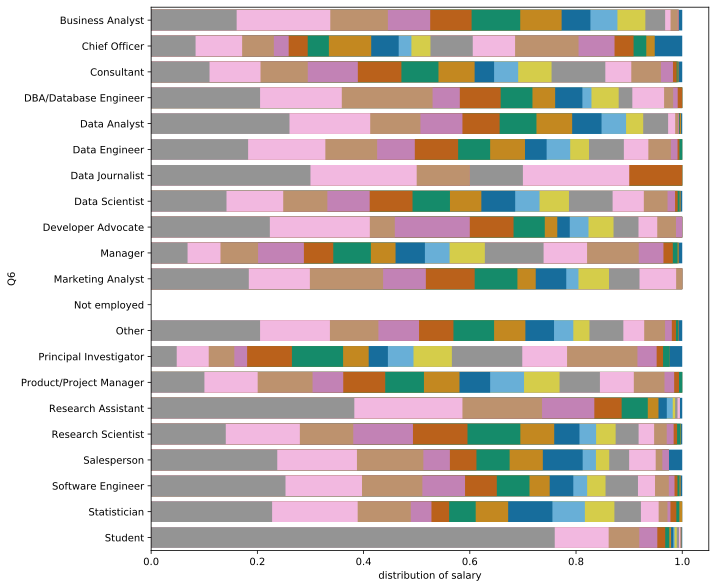

In [68]:
df = mean_matrix('Q6', 'Q9').dropna().cumsum(axis='columns')
for idx, col in enumerate(df.columns[::-1]):
    sns.barplot(x=df[col], y=df.index, color=sns.color_palette('colorblind')[idx%10])

plt.xlabel('distribution of salary')
print(df.columns.tolist())
plt.show()

The colors are awful but it displays the salary distribution, you can see that students clearly are in the lower parts similar to research assistants, notice that jobs with low statistical count can create a distortion as e.g. data journalist only has about 20 records. Jobs such as Manager and Principal Investigator seem to have a very even distribution indicating a faster climbing up the salary ladder.

In a similar fashion for other questions you could construct the same graph.

Another way to look at these things would be to use the difference between true and expected values, we already created the degree for differences, let's turn this into a bar plot.

In [69]:
df = degree_diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()
df

Q4
Bachelor’s degree                                                   -188.182578
Some college/university study without earning a bachelor’s degree    -20.266835
Professional degree                                                  -16.634066
I prefer not to answer                                                -7.157366
No formal education past high school                                  -6.855726
Master’s degree                                                       57.349472
Doctoral degree                                                      181.747100
dtype: float64

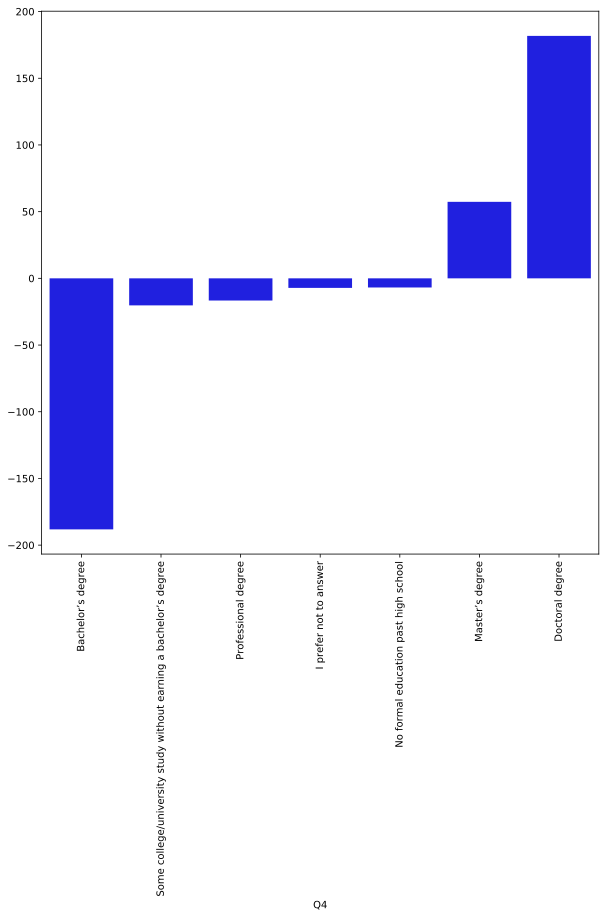

In [70]:
sns.barplot(x = df.index.astype('str'), y=df, color='b')
plt.xticks(rotation=90)
plt.show()

There are a lot of things you can still do to beautify this graph, but that's not our main interest, it shows the under- and overrepresented groups in high paying jobs. It would be wise however to create a relative version of this, as e.g. bachelor's degrees might be much more prevalent than others.

The same can be done with groupings of profession/job

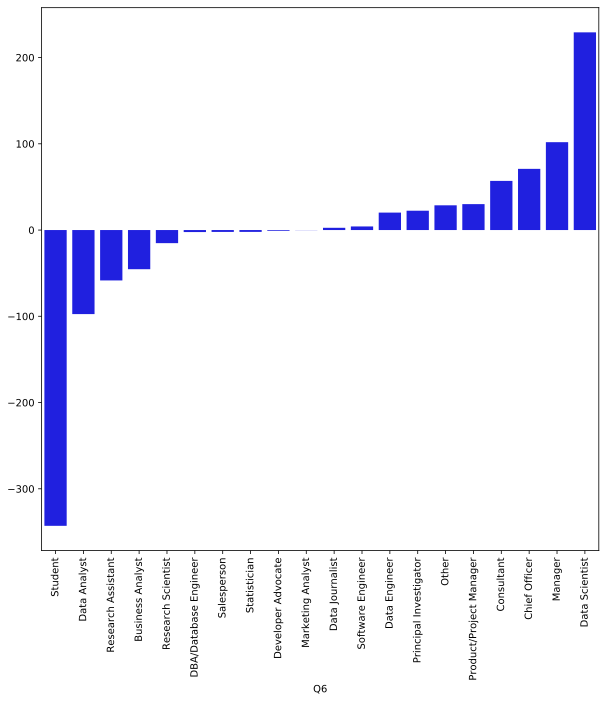

In [71]:
df = prof_diff.loc[:,'100-125,000':'400-500,000'].sum(axis='columns').sort_values()
sns.barplot(x = df.index.astype('str'), y=df, color='b')
plt.xticks(rotation=90)
plt.show()

To keep things consistent and because people love bar charts, we can use them to also display the disparity of choices of programming languages between high paying data scientists and all persons

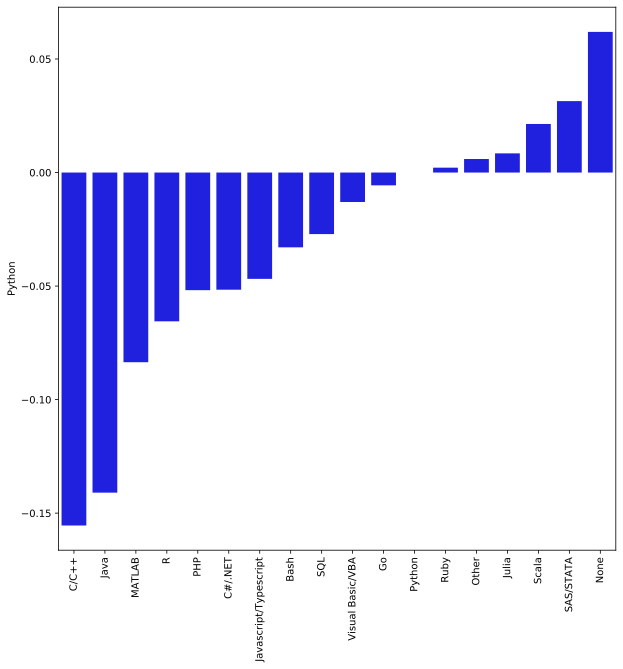

In [72]:
df = (high_paying_job_corr-all_jobs_corr).Python.sort_values()
sns.barplot(x = df.index.astype('str'), y=df, color='b')
plt.xticks(rotation=90)
plt.show()

you can see that the correlation between python and C/C++ is 15% less likely for high paid data scientists, indicating that it is not a good choice to learn next, in contrast languages such as Scala and SAS are a good option!

As far as my knowledge goes, the increase in correlation with None is because they are both negative and Python is more often chosen for data scientists, therefore the option 'not Python, not None' (but another language) is less often chosen, resulting in a higher correlation.

If you would want to make things a bit more fancy, you could use a clustermap, underlaying an algorithm will cluster your parameters into groups, here we cluster the correlation between common languages.

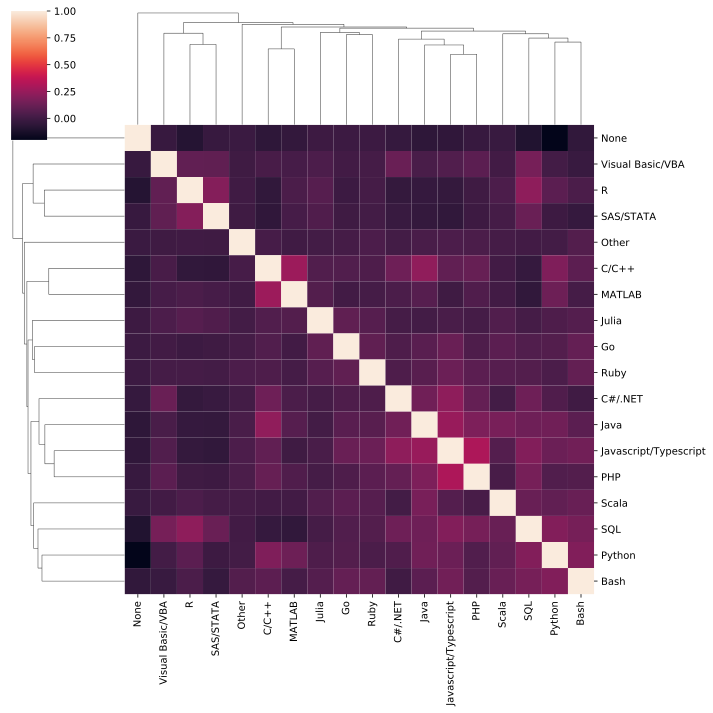

In [73]:
df = info_df[['Q6','Q9']].join(answer_dfs['Q16'])
sns.clustermap(df.corr('spearman'))
plt.show()

The algorithm was able to group languages such as Python, Bash, SQL and Scala, indicating that there is some correlation, but this graph makes things rather complicated in my opinion.

Now about time spending, we could visualize this by showing the difference between high paid scientists and regular persons

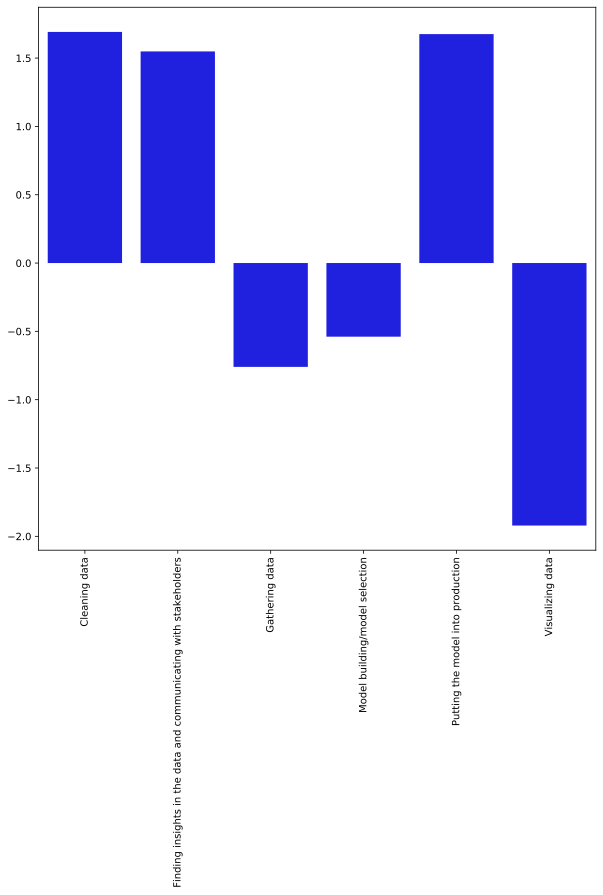

In [74]:
df = time_high_pay-time_all
sns.barplot(x = df.index.astype('str'), y=df, color='b')
plt.xticks(rotation=90)
plt.show()

we can see they spend more time on cleaning data, communication and production readiness, but less on visualization.
Efficient time handling can be crucial for a good career!

At last we discussed age vs experience, as we cannot use histograms and overlapping is not possible with different categories (age vs exp) we are stuck with a bar chart. The repetivity of our dataset is reflected in our visualization.

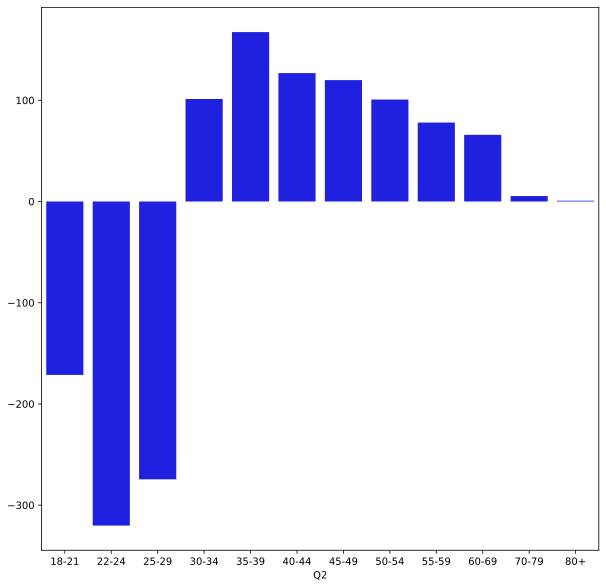

In [75]:
df = age_diff
sns.barplot(x = df.index, y=df, color='b')
plt.show()

Although simple it clearly shows the surplus of older persons in the high paying jobs.

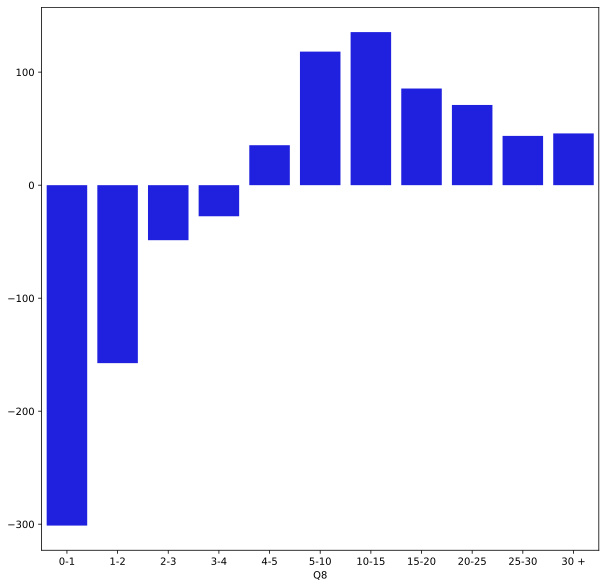

In [76]:
df = exp_diff
sns.barplot(x = df.index, y=df, color='b')
plt.show()

And as known before, experience gets your salary going from the 5 years and onwards

## Summary

- Degrees and Job title strongly influences job salary
- Job sectors as Academics are underpayed
- For a data Scientist using python aim for other skills such as Scala and forget C/C++
- Your choice of Machine Learning library is of no importance
- Data Scientists spend less time visualizing and more cleaning, communicating and production 
- Data Scientists are more worried about biases in their analysis
- Although both relevant, Age is more an indicator of a higher salary than experience, never to late to chase your dreams!